In [1]:
import numpy as np
from scipy.linalg import svd
import matplotlib.pyplot as plt

In [2]:
from ridge_tools import ridgeregressiongamma, vec_len

In [3]:
from sklearn.datasets import make_regression

In [4]:
from sklearn.linear_model import LinearRegression, Ridge

CPU times: user 802 ms, sys: 180 ms, total: 982 ms
Wall time: 164 ms
CPU times: user 765 ms, sys: 224 ms, total: 989 ms
Wall time: 171 ms
CPU times: user 762 ms, sys: 222 ms, total: 984 ms
Wall time: 167 ms
CPU times: user 689 ms, sys: 244 ms, total: 933 ms
Wall time: 171 ms
CPU times: user 784 ms, sys: 200 ms, total: 984 ms
Wall time: 166 ms
CPU times: user 773 ms, sys: 195 ms, total: 968 ms
Wall time: 161 ms
CPU times: user 769 ms, sys: 202 ms, total: 971 ms
Wall time: 164 ms
CPU times: user 779 ms, sys: 194 ms, total: 973 ms
Wall time: 162 ms


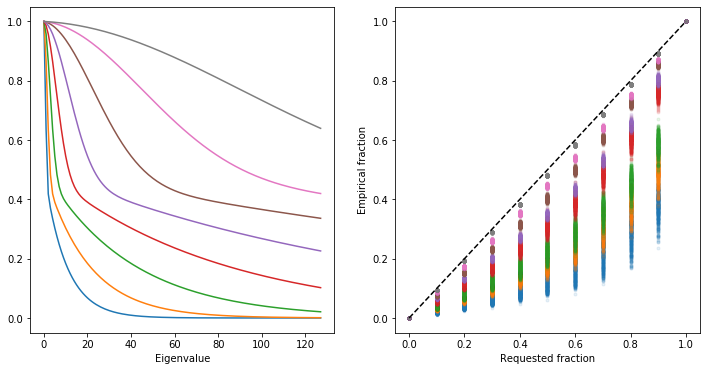

In [31]:
fig, ax = plt.subplots(1, 2)
ranks = [1, 2, 4, 8, 16, 32, 64, 128]
n_features = np.max(ranks)

for effective_rank in ranks:
    X, y = make_regression(
        n_samples=1000,
        n_features=n_features,
        n_informative=n_features,
        n_targets=500,
        bias=0.0,
        effective_rank=effective_rank,
        tail_strength=0.5,
        noise=0.0,
        shuffle=True,
        coef=False,
        random_state=None,)
    uu, selt, vv = svd(X, full_matrices=False)
    ax[0].plot(selt)
    %time coef, alphas = ridgeregressiongamma(X, y, fracs=fracs)
    hols = LinearRegression().fit(X,y).coef_.T
    kk = 0
    empirical_fracs = np.empty(len(fracs) * hols.shape[-1])
    intended_fracs = np.empty(len(fracs) * hols.shape[-1])
    for ii in range(len(fracs)):
        for jj in range (hols.shape[-1]):
            empirical_fracs[kk] = vec_len(coef[:, ii, jj]) / vec_len(hols[:, jj])
            intended_fracs[kk] = fracs[ii]
            kk += 1
    ax[1].plot(intended_fracs, empirical_fracs,  '.', alpha=0.1)

ax[1].plot([0, 1], [0,1], 'k--')
ax[0].set_xlabel('Eigenvalue')
ax[1].set_xlabel('Requested fraction')
ax[1].set_ylabel('Empirical fraction')
fig.set_size_inches([12, 6])

In [27]:
X.shape, y.shape

((1000, 128), (1000, 500))

In [9]:
fracs = np.arange(0, 1.1, .1)

In [10]:
%%time
coef, alphas = ridgeregressiongamma(X, y, fracs=fracs)

CPU times: user 104 ms, sys: 35.3 ms, total: 140 ms
Wall time: 25.8 ms


In [11]:
hols = LinearRegression().fit(X,y).coef_.T

In [12]:
import pandas as pd
import seaborn as sns

In [13]:
# pp, ff, bb
kk = 0
empirical_fracs = np.empty(len(fracs) * hols.shape[-1])
intended_fracs = np.empty(len(fracs) * hols.shape[-1])
for ii in range(len(fracs)):
    for jj in range (hols.shape[-1]):
        empirical_fracs[kk] = vec_len(coef[:, ii, jj]) / vec_len(hols[:, jj])
        intended_fracs[kk] = fracs[ii]
        kk += 1


In [14]:
df = pd.DataFrame(data = np.stack([intended_fracs, empirical_fracs]).T, columns=['fracs', 'empirical_fracs'])

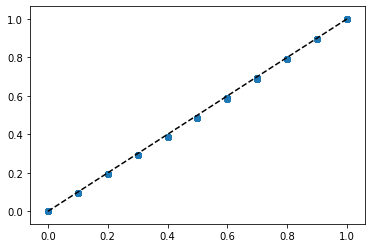

In [15]:
plt.scatter(intended_fracs, empirical_fracs)
plt.plot([0, 1], [0,1], 'k--')